# Introduction




Given the position of the robot perhaps through some sensor such as a GPS, we have to find the map of the world. In essence, this is a filtering problem. We need two components to solve this filtering problem: a state and a measurement model. The state is the map of the world we are trying to find; This map of the world can be a pixelized grid of cells or a map of landmarks. The measurement model is $p(z_t | m, l_t)$, or the probability of making an observation $z_t$ given a map $m$ and a location on the map $l_t$. There is no need to be concerned about the robot's controls since the position of the robot is already known. As such, there is no motion model explicitly defined.

# Solving the Problem



The first step to find a solution to the mapping problem is partitioning the world into cells, with each being one of two states: filled or empty. The individual grid cells will have the label $m_i$, and $\vec{m}$ is the vector of all grid cells. The goal is to calculate the posterior $p(m | z_{1:t}\;,\; x_{1:t} \; )$. Now, there is a dimensionality issue (the curse of dimensionality); $p(m | z_{1:t} \;,\; x_{1:t}\;)$ is a joint distribution over all grids that is exponentially large: $2^{|\;\vec{m} \;|}$ possible states since we have a vector $\vec{m}$ with states that are either filled or empty. Now, filtering each cell independently, assuming that they are in fact idependent (might be unrealistic). Accordingly, the reduction of the complexity is reduced from $2^{|\;\vec{m} \;|}$ to $2|\;\vec{m} \;|$ by reconstructing the map through the products of the map's marginal probability: $p(m | z_{1:t}\;, \; x_{1:t}\;) = \prod\limits_{i} P(\; \mathbf{m}_i \;| \; z_{1:t}\;, \; x_{1:t} \;)$, where $m_i$ is each individual grid cell. Note, the unrealistic part of the independence assumption is that obstacles may span more than one cell. However, the assumption makes the problem tractable because our distribution is no longer exponentially large.


# Lets Derive this problem

Let $X^{i}$ represent the state of grid cell $m_i$. Now the state is either $x \text{ or } 1$, meaning filled, or $\overline{x} \text{ or } 0$, meaning empty. The probability that a cell is filled given the measurements starting with a Bayesian filter is $$p(x| z_{1:t}\;) = \frac{p(z_t | x, z_{1:t-1} \; )p(x|z_{1:t-1}\;)}{p(z_t | z_{1:t-1}\;)}$$

Note, we can make the Markov assumption: $p(z_t | x, z_{1:t-1}\;) = p(z_t | x)$


$$p(x | z_{1:t}\;) = \frac{p(z_t | x)p(x | z_{1:t-1}\;)}{p(z_t | z_{1:t-1}\;)}$$

$$p(x | z_{1:t} \; ) = \frac{p(x | z_t)p(z_t)}{p(x)}\frac{p(x | z_{1:t-1} \;)}{p(z_t | z_{1:t-1} \; )}$$

Now $p(x | z_{1:t} \;)$ is based on the inverse sensor model, $p(x | z_t \;)$, in place of the familiar forward model $p(z_t | x)$. The inverse sensor model specifies a distribution over the binary state variable as a function of measurements. A sensor model for a laser scanner device might look like the figure below


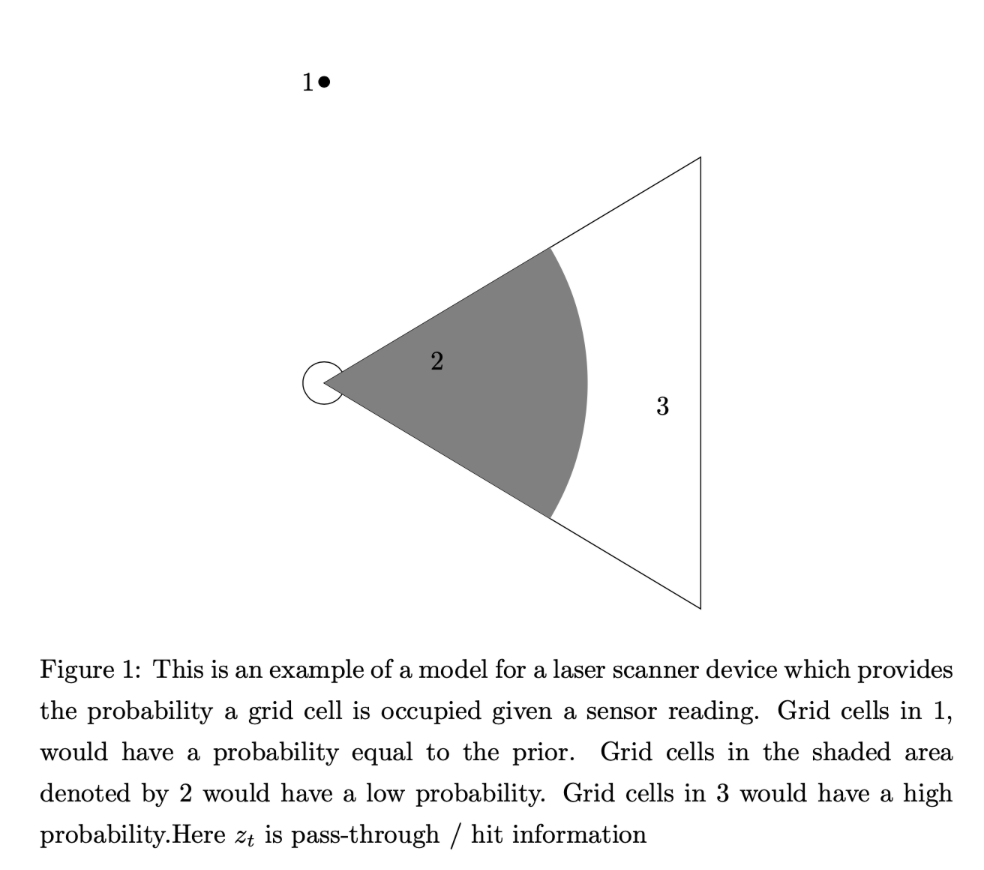

# Deriving Two Update Rules


A matching update rule for $p(x | z_{1:t}\;)$ is $$p(\overline{x} | z_{1:t}\;) = \frac{p( \overline{x} | z_t)p(z_t)}{p(\overline{x})}\frac{p(\overline{x} | z_{1:t-1}\;)}{p(z_t | z_{1:t-1}\;)}$$

Now what can we infer if we divide the two update rules?

$$ \frac{p(x | z_{1:t}\;)}{p(\overline{x} | z_{1:t}\;)} = \frac{p(x | z_t)}{p(\overline{x} | z_t)}\frac{p(\overline{x})}{p(x)}\frac{p(x | z_{1:t-1}\;)}{p(\overline{x}| z_{1:t-1}\;)} \frac{p(z_t | z_{1:t-1}\;)}{p(z_t | z_{1:t-1}\;)} = \frac{p(x | z_t)}{p(x)}\frac{p(\overline{x})}{p(\overline{x} | z_t)}\frac{p(x | z_{1:t-1})}{p(\overline{x}| z_{1:t-1}\;)}$$

The purpose of this two update rule is to have a recursive update rule. If the probability of $\overline{x}$ decreases with the observation of $z_t$, then $p(\overline{x}) > p(\overline{x}|z_t)$. Consequently, the belief on $x$ increases relative to the belief on $\overline{x}$


## Deriving the Log Odds

After we have implemented the update rule, we take the log odds of the update rule: we take the log odd of the belief the square is filled over the belief the square is not filled. Label this as $l_t(x)$




> It is more efficient to learn the log odds of $Pr[m_i | x_{1:\;t}\;,z_{1:t}\;]$ to avoid computing a product of probabilities that may result in an underflow.

> Recall the log odds of a binary distribution $Pr[X]$: $$ l(x) = \log \frac{Pr[X]}{Pr[\overline{X}]} = \log \frac{Pr[X]}{1 - Pr[X]}$$

> We can easily recover $Pr[X]$ given $l(x)$ as $$Pr[x] = 1 - \frac{1}{1 + exp(l(x))}$$

> The derivation is simple

$$l(x) = \log \frac{Pr[X]}{1 - Pr[X]} \Rightarrow exp(l(x)) = Pr[x]/(1 - Pr[x]) \Rightarrow exp(l(x)) = Pr[x](1 + exp(l(x))) \Rightarrow  Pr[x] = \frac{exp(l(x))}{1 + exp(l(x))} = \frac{1 - 1 + exp(l(x))}{1 + exp(l(x))} = 1 - \frac{1}{1 + exp(l(x))}$$

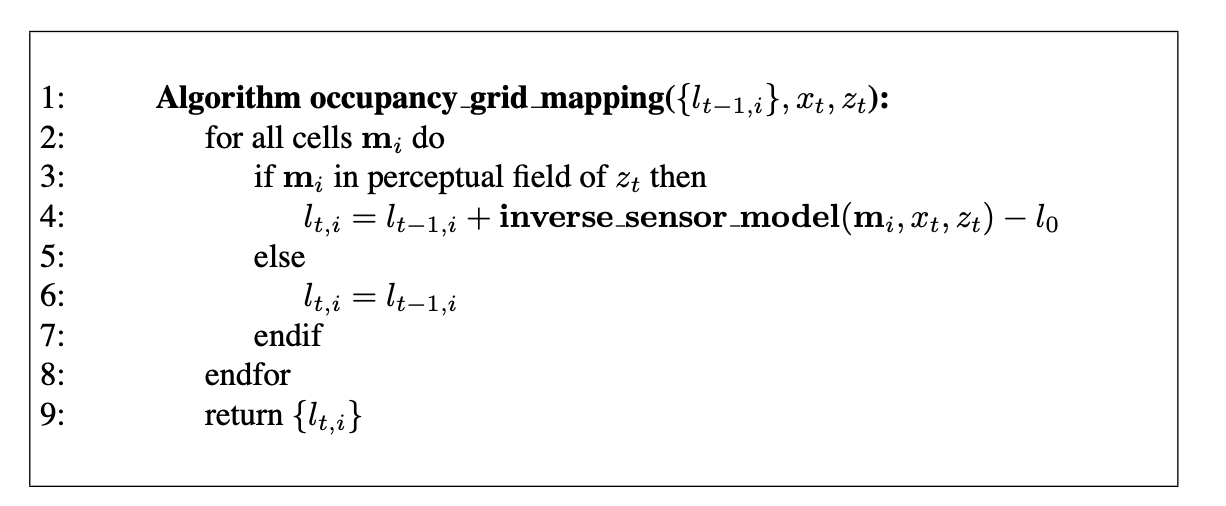

###Note!!
What we can see from the algorithm aboves is the rules to update our log-likelihood

> Log odds of $Pr[m_i | x_{1:t}\;, z_{1:t}\;]$ can be written as the sum of log odds of three separate terms:
$$l_{i,1:t} = \log \frac{Pr[m_i | x_{1:t}\;, z_{1:t}\;]}{Pr[\overline{m}_i | x_{1:t}\;, z_{1:t}]} = \log \frac{Pr[m_i | x_{1:t-1}\;, z_{1:t-1}\;]}{1- Pr[m_i | x_{1:t-1}\;, z_{1:t-1}\;]}\frac{Pr[m_i | x_t, z_t]}{1 - Pr[m_i | x_t\;, z_t]}\frac{1 - Pr[m_i]}{Pr[m_i]} = l_{i, 1:t-1} \; + l_{i,t} - l_i$$

> $l_{i, 1:t-1}\;$ is the log odds of $m_i$ given state and measurements from 1 to t-1

> $l_i$ is the log odds of $m_i$ (prior), e.g. $l_i = 0$ if $Pr[m_i] = Pr[\overline{m}_i]$, which is only possible if  $Pr[m_i] = Pr[\overline{m}_i] = 0.5$

# Occupancy Grid Problem in 10x10

A robot is moving around on a 10x10 grid and trying to build an occupancy map. Its state is its (row, col) coordinates $\mathbf x = (x_i,x_j)$.  It is equipped with a simple but noisy range sensor, which always returns an integer range measurement $z$ looking to the **right**. We will use the following inverse sensor model, where $\mathbf m = (m_i,m_j)$ is a grid cell:

$$\Pr(\mathbf m| \mathbf x,z) = \begin{cases} 0.27, \; m_i - x_i = 0 \text{ and } x_j < m_j < x_j+z \\ 0.49, \; |m_i - x_i| = 1 \text{ and } x_j < m_j < x_j+z \\ 0.77, \; m_i - x_i = 0 \text{ and } x_j + z \leq m_j \leq x_j+z+1 \\ 0.64, \; |m_i - x_i| = 1  \text{ and } x_j + z \leq m_j \leq x_j+z+1 \end{cases}$$

Now, we only update cells in the same row, the row above, and the row below the robot. Updated cells lie in the columns to the robot's right up to one column past the measured range. Cells closer than the measured range are more likely to be free; cells at and immediately beyond the measured range are more likely to be occupied. We treat cells in the two adjacent rows in the same way, but with less certainty. Finally, all cells outside of the described subgrid are left unchanged.

# Code

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = {(0,0): 5, (1,1):3, (2,1):3, (3,2):8, (4,2):8, (4,3):7, (5,3):2, (6,3):4, (6,2):5, (7,3):4, (8,2):2, (8,1):3, (9,0):10}
len(data.keys())

13

In [51]:
def neighbors(obs):
  neighbors = []
  row, col = obs
  minV, maxV = [0,9] #this are the limits of our 10x10 grid
  if row > minV:
    for i in range(maxV+1):
      if i > col:
        neighbors.append((row-1, i))
  if row < maxV:
    for i in range(maxV+1):
      if i > col:
        neighbors.append((row+1, i))
  for i in range(maxV + 1):
    if i > col:
      neighbors.append((row, i))
  return neighbors
def update_map(grid, prior, x,z):
  row, col = x # our current state
  n_updates = neighbors(x)
  for val in n_updates:
    mi, mj = val
    if mi - row == 0 and col < mj and mj < col + z:
      tmp = np.log(0.27/(0.73)) # tmp is l_{i, t}
      grid[mi][mj] = grid[mi][mj] + tmp - prior[mi][mj]
    if abs(mi - row)== 1 and col < mj and mj < col + z:
      tmp = np.log(0.49/0.51) # tmp is l_{i, t}
      grid[mi][mj] = grid[mi][mj] + tmp - prior[mi][mj]
    if mi - row == 0 and col + z <= mj and mj < col + z + 1:
      tmp = np.log(0.77/0.23) # tmp is l_{i, t}
      grid[mi][mj] = grid[mi][mj] + tmp - prior[mi][mj]
    if mi - row == 0 and col + z <= mj and mj < col + z + 1:
      tmp = np.log(0.64/0.36) # tmp is l_{i, t}
      grid[mi][mj] = grid[mi][mj] + tmp - prior[mi][mj]
  return grid, prior
def get_probs(grid):
  x,y = np.shape(grid)
  graph = np.zeros((x,y))
  for i in range(x):
    for j in range(y):
      graph[i][j] = 1 - 1/(1+np.exp(grid[i][j]))
  return graph


In [60]:
def threshold_stats(threshold, graph):
  #this function is for analysis purposes
  below_or_at = 0
  above = 0
  free = []
  occupied = []
  freerows = []
  x,y = np.shape(graph)
  for i in range(x):
    frecount = 0
    for j in range(y):
      if graph[i][j] <= threshold:
        below_or_at += 1
        frecount += 1
        free.append((i,j))
      else:
        above += 1
        occupied.append((i,j))
    if frecount == y:
      freerows.append(i)
  thresholds = ("Count above threshold: " + str(above), "Count below threshold: " + str(below_or_at))
  fig, ax = plt.subplots()
  counts = [above, below_or_at]
  bar_colors = ["tab:red", "tab:blue"]
  ax.bar(thresholds, counts, label=thresholds, color=bar_colors)
  ax.set_title("Counts above or below the threshold")
  ax.set_ylabel("Counts")
  ax.legend(title='Color Key')
  plt.show()
  print(f"Cleared rows according to {threshold} threshold: {freerows}")
  print(f"Percentage of free cells according to {threshold} threshold: {len(free)/(x*y)}")
  print(f"Percentage of occupied cells according to {threshold} threshold: {len(occupied)/(x*y)}")



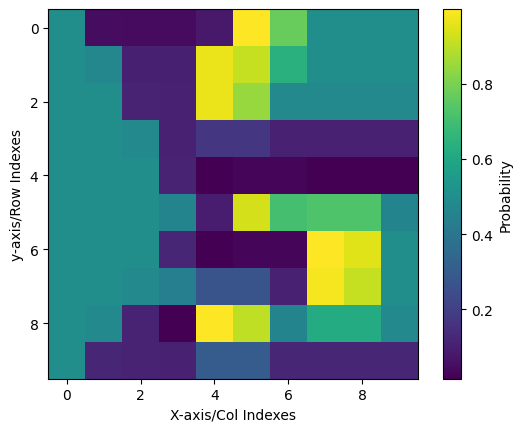

In [53]:
for obs,z in data.items():
  grid,prior = update_map(grid,prior, obs, z)
graph = get_probs(grid)
shw = plt.imshow(graph)
plt.xlabel("X-axis/Col Indexes")
plt.ylabel("y-axis/Row Indexes")
bar = plt.colorbar(shw)
bar.set_label("Probability")
plt.show()


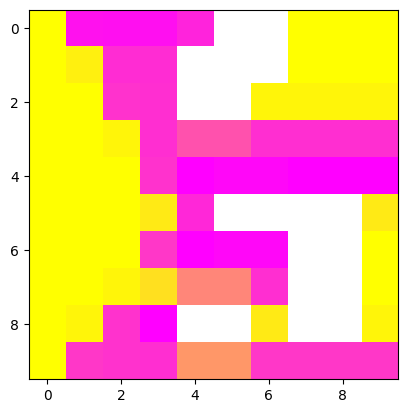

In [56]:
#According to the probability map above, we have three main obstacles
#We can mask the probabiities to actually get the potetntial obstacles more visibly
import matplotlib
masked_arr = np.ma.masked_where(graph > 0.5, graph)
cmap = matplotlib.cm.spring
cmap.set_bad(color='w')
plt.imshow(masked_arr, cmap=cmap)
plt.show()

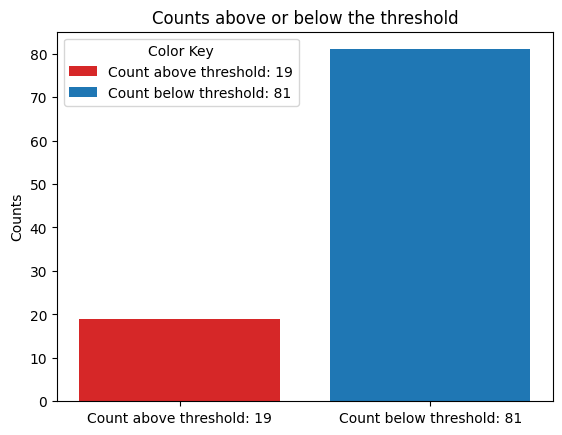

Cleared rows according to 0.5 threshold: [3, 4, 9]
Percentage of free cells according to 0.5 threshold: 0.81
Percentage of occupied cells according to 0.5 threshold: 0.19


In [61]:
threshold_stats(0.5, graph)

# Bibliography
- Thrun, Sebastian; Burgard, Wolfram; Fox, Dieter. "Probabilistic Robotics." MIT Press, 2005. pp 221-9.

In [45]:
masked_